### Import all library for scraping data from amazon. we'll be using Selenium, Beautifulsoup, and urllib

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
import time

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By

### Step 1 - Set up the automation configurations for running the Chrome browser in headless mode 

We start by initiating the selenium driver and options. explanation:

`--headless`: This argument runs Chrome in headless mode, meaning it operates without a user interface. This is useful for web scraping or automated tasks where a graphical interface is not needed.

`--no-sandbox`: This argument disables the sandboxing for Chrome. Sandboxing is a security feature that helps protect your system from potentially malicious web pages. However, in some environments, running Chrome with sandboxing may cause issues, and disabling it can be a workaround.

`--disable-setuid-sandbox`: This argument also relates to sandboxing. It disables the setuid sandbox (a type of privilege escalation prevention). This is often used in conjunction with --no-sandbox to address sandbox-related issues.

`getAmazonSearch` this function is for request to the search product in amazon

`Searchasin` this function is used to get the id of each product that we search

`Searchreviews` this function is used to get reviews from each product detail page


In [5]:
chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-setuid-sandbox')

browser = webdriver.Chrome(options=chrome_options)

def getAmazonSearch(search_query):
    url = "https://www.amazon.com/s?k="+search_query
    print(url)
    browser.get(url)
    time.sleep(2)

    return browser.current_url

def Searchasin(asin):
    url="https://www.amazon.com/dp/"+asin
    print(url)
    browser.get(url)
    time.sleep(2)
    
    return browser.current_url

def Searchreviews(review_link):
    url="https://www.amazon.com"+review_link
    print(url)
    browser.get(url)
    time.sleep(2)

    return browser.current_url

### Step 2 - Making the request using `getAmazonSearch` function

continue with requesting Amazon product. first, we should request by calling the `getAmazonSearch` function. and Then we use `urlopen` to access the page by setting the headers. if we do not set the headers we will probably get the 503 errors. next, we use Beautifulsoup to parse the raw HTML that we requested with urlopen. then we can make a test to get the product names like below

In [105]:
current_page_url = getAmazonSearch("titan+men+watches")    

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

raw_html = urlopen(Request(current_page_url, headers=headers))

soup = BeautifulSoup(raw_html, "html.parser")

product_names = []
for i in soup.findAll("span",{'class': 'a-size-medium a-color-base a-text-normal'}): # the tag which is common for all the names of products
    product_names.append(i.get_text()) #adding the product names to the list

https://www.amazon.com/s?k=titan+men+watches


### Print out the names of product
Test with print out the product names array. it will return an array of `product_name`

In [106]:
product_names

['OLEVS Watch for Men Diamond Business Dress Analog Quartz Stainless Steel Waterproof Luminous Date Two Tone Luxury Casual Wrist Watch',
 'OLEVS Classic Wrist Watches,Men Business Watches Dress Watch with Day,Green/Black/White/Blue Face,Flywheel Multifunction Luminous Men Stainless Steel Wristwatch']

### Step 3 - Making The Request to Amazon to get the product ID

in this section, we'll be learning about how to get the product ID so we can automate the request by each page with the product ID. 
we are requesting with the same keyword `titan+men+watches` and then don't forget to use headers for the request in urllib. and then we create an instance of the `data_asin` array and find the element with attribute `data-asin` then we push it to the `data_asin` list

In [107]:
current_page_url = getAmazonSearch("titan+men+watches")

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.71 Safari/537.36'}

req = Request(current_page_url, headers=headers)

raw_html = urlopen(req, timeout=60)

soup = BeautifulSoup(raw_html, "html.parser")

data_asin = []
for i in soup.findAll("div", attrs={'data-asin' : True}):
    data_asin.append(i['data-asin'])

https://www.amazon.com/s?k=titan+men+watches


In [108]:
result = list(filter(str.strip, data_asin)) # Remove the empty string

In [109]:
print(result) # print the result

['B00AFTTQ8I', 'B00DZHQ4J6', 'B018VZBTLY', 'B00UFUG6AS', 'B01MTKTUVN', 'B018VZ7H60', 'B018K68CLY', 'B01N8UHYTB', 'B077S3KNXJ', 'B01EV8WXCY', 'B00YUEA6DI', 'B00SUZ5R0A', 'B00FJ3ZX0U', 'B00821DUKQ', 'B07D492HSS', 'B01A0R83EW', 'B0995YG831', 'B0B42LMKJL', 'B07QV165QG', 'B07FFBHM7F', 'B0179HF3OY', 'B07MXK7MF3', 'B003J37666', 'B07PY2246B', 'B0BZ4C7KVD', 'B09GVW8YTR', 'B0CFW2JQPX', 'B0BWTPZV7D', 'B008OVTD6O', 'B00821GK30', 'B0792LW2FT', 'B0792MKR36', 'B0BM4BYYRS', 'B0B5ZWGF7Y', 'B093ST51Y4', 'B09NSQ8XRK', 'B00FJ45Y8U', 'B00BQCB7V2', 'B0792SCS43', 'B07MXGGWG4', 'B0792R17Q1', 'B007NM8S52', 'B01LXRKI8Z', 'B00KQ1WXDK', 'B07MB37YJ8', 'B007R9Y83W', 'B07CNRJT97', 'B000AQVRWO', 'B00MIFJ2UO', 'B01HEVAPSO', 'B003J3769I', 'B08SQDVS2J', 'B007NM5FDK', 'B00ULQ2CUY', 'B003J37698', 'B00IAHS836', 'B0792T5VDQ', 'B01CM8GUHE', 'B097HRWJVH', 'B0C3QGHKGX']


### Step 4 - Get the product Detail page

in this section, we learn how to scrape the link to the product detail page. we also call the `Searchasin()`to get the link of product detail page. we create an list of link and then we fill the list with the link that we requested.

In [110]:
link = []
for i in range(len(result)):
    response = Searchasin(result[i])
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
    raw_html = urlopen(Request(response, headers=headers))
    soup = BeautifulSoup(raw_html, "html.parser")
    for i in soup.findAll("a",{'data-hook':"see-all-reviews-link-foot"}):
        link.append(i['href'])

https://www.amazon.com/dp/B00AFTTQ8I
https://www.amazon.com/dp/B00DZHQ4J6
https://www.amazon.com/dp/B018VZBTLY
https://www.amazon.com/dp/B00UFUG6AS
https://www.amazon.com/dp/B01MTKTUVN
https://www.amazon.com/dp/B018VZ7H60
https://www.amazon.com/dp/B018K68CLY
https://www.amazon.com/dp/B01N8UHYTB
https://www.amazon.com/dp/B077S3KNXJ
https://www.amazon.com/dp/B01EV8WXCY
https://www.amazon.com/dp/B00YUEA6DI
https://www.amazon.com/dp/B00SUZ5R0A
https://www.amazon.com/dp/B00FJ3ZX0U
https://www.amazon.com/dp/B00821DUKQ
https://www.amazon.com/dp/B07D492HSS
https://www.amazon.com/dp/B01A0R83EW
https://www.amazon.com/dp/B0995YG831
https://www.amazon.com/dp/B0B42LMKJL
https://www.amazon.com/dp/B07QV165QG
https://www.amazon.com/dp/B07FFBHM7F
https://www.amazon.com/dp/B0179HF3OY
https://www.amazon.com/dp/B07MXK7MF3
https://www.amazon.com/dp/B003J37666
https://www.amazon.com/dp/B07PY2246B
https://www.amazon.com/dp/B0BZ4C7KVD
https://www.amazon.com/dp/B09GVW8YTR
https://www.amazon.com/dp/B0CFW2JQPX
h

Now we have the 'see all review' links. Using this link along with a page number, we can extract the reviews in any number of pages for all the products

### Step 5 - Scrap the review the product
in this section, we making a request to get the review URL from the request to the detailed product page

In [111]:
reviews = []

for j in range(len(link)):
    for k in range(100):
        try:
            current_url = Searchreviews(link[j]+'&pageNumber='+str(k))
            headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.71 Safari/537.36'}
            raw_html = urlopen(Request(current_url, headers=headers))
            soup = BeautifulSoup(raw_html, "html.parser")

            for i in soup.findAll("span", {'data-hook': "review-body"}):
                reviews.append(i.text)
        except Exception as e:
            # Print or log the exception, and break the inner loop to move to the next link
            print(f"An error occurred: {e}")
            break


https://www.amazon.com/Fossil-Quartz-Stainless-Leather-Chronograph/product-reviews/B00AFTTQ8I/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/Fossil-Quartz-Stainless-Leather-Chronograph/product-reviews/B00AFTTQ8I/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/Fossil-Quartz-Stainless-Leather-Chronograph/product-reviews/B00AFTTQ8I/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/Fossil-Quartz-Stainless-Leather-Chronograph/product-reviews/B00AFTTQ8I/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/Fossil-Quartz-Stainless-Leather-Chronograph/product-reviews/B00AFTTQ8I/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/Fossil-Quartz-Stainless-Leather-Chronograph/product-reviews/B00AFTTQ8I/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageN

In [136]:
len(reviews)

74

next after we scraped the first page of product page we have to convert the reviews data into a dictionary
Because we want to load the dataframe from dictionary

In [141]:
rev = {'reviews':reviews} #converting the reviews list into a dictionary

In [142]:
import pandas as pd

review_data = pd.DataFrame.from_dict(rev) #converting this dictionary into a dataframe

In [143]:
review_data.sample(5)

,reviews
53,\nVery good product. The silver and gold tones make it really nice.\n
51,\nGood\n
69,"\nThis was to replace my last Seiko watch that I had for ten years, and got beat up on the job, this newer version of my last one is slightly bigger, however, it is considerably lighter, and they were both Titanium, and with Sapphire crystal's, it keeps perfect time, thankfully its still made in Japan.\n"
17,\nThis watch in the rose gold / blue is fantastic. It looks better in person than in the photos. The band is comfortable and is quality leather. The hands do have lume and glow well in the dark. You are getting a lot in this watch for a cheap price point. I totally recommend this watch.\n
52,\nGood\n


In [144]:
review_data.shape

(74, 1)

In [145]:
review_data.to_csv('Scraping reviews.csv',index=False) #converting the dataframe to a csv file so as to use it later for further analysis

# It's time to sentiment anlysis

In [146]:
import numpy as np # import numpy

In [148]:
pd.set_option('display.max_colwidth', 1)
pd.set_option('display.max_columns', None)

### Load the data that we scraped before

In [149]:
data = pd.read_csv('Scraping reviews.csv')

In [150]:
data.head()

,reviews
0,"\nA conservative style, reliability and a reasonable price. I have had the watch for about 3 years now and the original battery is still running. The band is genuine leather and is easily interchangeable with the black leather version that Fossil makes without the use of special tools (there is small lever on the pin). This makes it fashionable no matter the attire you wear (brown shoes/belt = brown band, black shoes/belt = black band). The timing function works, but buttons tend to be stiff and only one seems to work. However, I did not purchase it for the timing function and rarely use it. It keeps great time, and the large roman numerals are easy to read from an arm's length away.I assume because it has a leather band you are not planning to take it under the water/in the shower. However, the crown tends to wiggle open after long periods of being worn. The crown has engraved ridges that get pulled by the skin as the wrist moves. This is very minor though. Beyond washing your hands, I would not take this near water.\n"
1,"\nHigher quality than I expected for the price. Visible, working gears make it a fun distraction while waiting. Highly recommend.\n"
2,\nReally Good looking time piece. Wears more expensive Price point excellent. I really recommend Fossil watches for men.\n
3,"\nLooks svery pink, plus it came in a box that have floors, hearts and color pink.Can't understand why is advertise as a product for men.\n"
4,"\nI bought this replacement of the same model watch due to a catastrophic fall which broke the previous one. The watch face is black which is a perfect contrast with the light minute/hour hands as well as the light hour markers. This would be my third Fossil watch. I love the quality.Cons: it comes with a thick leather band and is comfortable, however, the watch will roll around your wrist for about 3 weeks which is how long it takes the leather to conform to your wrist shape. Believe me when I say it’s well worth the wait. I receive lots of compliments about this watch.\n"


### Clean the data

Next is we want to clean the data from '\n' string text

In [151]:
df = data.copy() # Creating the copy of data

In [152]:
df['reviews'] = df['reviews'].apply(lambda x:x.strip('\n')) # To remove '\n' from every review

In [153]:
df.head()

,reviews
0,"A conservative style, reliability and a reasonable price. I have had the watch for about 3 years now and the original battery is still running. The band is genuine leather and is easily interchangeable with the black leather version that Fossil makes without the use of special tools (there is small lever on the pin). This makes it fashionable no matter the attire you wear (brown shoes/belt = brown band, black shoes/belt = black band). The timing function works, but buttons tend to be stiff and only one seems to work. However, I did not purchase it for the timing function and rarely use it. It keeps great time, and the large roman numerals are easy to read from an arm's length away.I assume because it has a leather band you are not planning to take it under the water/in the shower. However, the crown tends to wiggle open after long periods of being worn. The crown has engraved ridges that get pulled by the skin as the wrist moves. This is very minor though. Beyond washing your hands, I would not take this near water."
1,"Higher quality than I expected for the price. Visible, working gears make it a fun distraction while waiting. Highly recommend."
2,Really Good looking time piece. Wears more expensive Price point excellent. I really recommend Fossil watches for men.
3,"Looks svery pink, plus it came in a box that have floors, hearts and color pink.Can't understand why is advertise as a product for men."
4,"I bought this replacement of the same model watch due to a catastrophic fall which broke the previous one. The watch face is black which is a perfect contrast with the light minute/hour hands as well as the light hour markers. This would be my third Fossil watch. I love the quality.Cons: it comes with a thick leather band and is comfortable, however, the watch will roll around your wrist for about 3 weeks which is how long it takes the leather to conform to your wrist shape. Believe me when I say it’s well worth the wait. I receive lots of compliments about this watch."


In [154]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer

nltk.download('stopwords') # Downloading Stopwords

[nltk_data] Downloading package stopwords to /home/agung/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [155]:
STOPWORDS = stopwords.words("english") #stopwords are the most common unnecessary words. eg is, he, that, etc.

this is still about data cleaning now we want to remove if the data contains emoji or something.
next we create a function to remove the emoji

In [156]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii') # A function to remove emojis from the reviews

In [157]:
import re

def clean_text(text):
    ps=PorterStemmer()
    
    text=deEmojify(text) # remove emojis
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation
    
    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS] # Taking only those words which are not stopwords
    text_cleaned=" ".join([ps.stem(token) for token in tokens])
    
    
    return text_cleaned

In [158]:
df['cleaned_reviews']=df['reviews'].apply(lambda x:clean_text(x))

In [159]:
df.sample(5)

,reviews,cleaned_reviews
63,I am shareholder of this company by default I have to go with this company. #FantasticProduct 🤞,sharehold compani default go compani fantasticproduct
44,Looks amazing. Light weight.,look amaz light weight
30,None of the two nails work.,none two nail work
57,In the photo it appears to be green but actually it's navy blue 🔵. Good watch to buy .,photo appear green actual navi blue good watch buy
45,Good,good


we can see the different we create a new dataframe index called cleaned_reviews to see that the emoji is removed from data frame

### It's time to make a graph and plot

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

Generating a wordcloud to give a view of the words in the reviews based on their frequency of occurence

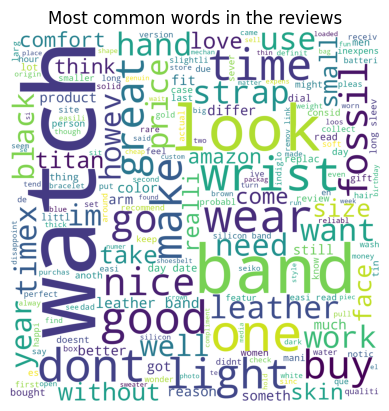

In [161]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='white')
wordcloud = wordcloud.generate(' '.join(df['cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

### Analyzing the sentiment of reviews with 'vader' library

In [165]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

Defining a function to find the sentiment of a review. It will return a dictionary having positive, negative and compound scores.

In [166]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

Defining a function to extract only the compound score.

In [168]:
def compound_score(text):
    comp = sentiment_analyzer_scores(text)
    return comp['compound'] # returns the compound score from the dictionary

In [169]:
df['sentiment_score'] = df['reviews'].apply(lambda x:compound_score(x)) # applying on the reviews column to get the score

In [170]:
df.sample(5)

,reviews,cleaned_reviews,sentiment_score
50,Not good,good,-0.3412
72,Very lightweight and attractive watch,lightweight attract watch,0.4877
56,"I got this watch as my birthday gift from my dad, like the dail it a silver colour and looking premium and the strap is a above average genuine leather. I can tell this is 💯 % original not fake.Recommended watch to buy. 😃",got watch birthday gift dad like dail silver colour look premium strap averag genuin leather tell origin fakerecommend watch buy,0.8481
15,This is a great watch. Just beautiful to look at! The blue just pops with the gold accents. Nice quality as expected with fossil. My husbands get several compliments while wearing it!!,great watch beauti look blue pop gold accent nice qualiti expect fossil husband get sever compliment wear,0.9369
67,Very nice looking watch and being titanium light weight. It comes with a kit that allows you to adjust the wrist band yourself and it was simple to do. That was fantastic as I was able to enjoy the watch immediately and did not have to pay a jeweler.,nice look watch titanium light weight come kit allow adjust wrist band simpl fantast abl enjoy watch immedi pay jewel,0.8804


We have got the sentiment score. Now categorizing the reviews based on the score into postive, negative and neutral using the below conditions.

In [171]:
def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [172]:
df['review_category'] = df['sentiment_score'].apply(lambda x:sentiment_category(x))

In [173]:
df.sample(5)

,reviews,cleaned_reviews,sentiment_score,review_category
25,"The media could not be loaded.\n \n\n\n\n This is the only review you need to read honestly.I recently had an itch for a Cartier Tank but decided to hang on till there's a special occasion. So i bought this to calm my itch for a while. It's better looking than the other 2 Tank clones that Titan sells, mainly due to the size. Both the other watches are like wearing a wall clock on your wrist. If they were available in the size of Titan Karishma, I'd buy them in a heart beat. Also a sapphire crystal would be appreciated.The main concern with Titan watches is that since the beginning, their cheaper watches bite the hair on your wrist. It's such a shame that there's absolutely no difference between a late 80's - 90's Titan and a modern Titan watch strap. My dad's 90's EXACTA has the same kind of strap and it removed the hair on his arms better than applying Veet, but more painful.The day the watch came in, I pulled the strap off and threw it out of the window and put a leather strap and it looks so much classier.The another bad thing with this watch is that it fits a 16mm strap size. They don't specify it anywhere and the customer support themselves don't know what size it fits. I measured it manually.If you get a true 16mm strap it will look like a ladies watch with still wierd proportions, mainly because of the weird hood they have welded to its lugs. So what i did was that I asked a jugadu watch repair person to get a 20mm strap and cut the ends 2mm each side and viola, it looks so much better. The extra 650 rupees I spent to make this watch wearable was so worth it.Registering of warranty is relatively easy. Just scan the card included and download the invoice from Amazon beforehand.Weight of the watch is good and is built nicely.Size is great for a dress watch or for something low profile.I however feel that the dial needs to be either completely white or silver. The landing strip in between of the dial is out of place but the indices almost save it's look.Overall, this watch is a better Tank replacement if you can retrofit a 20mm leather strap like I did, or if you regularly shave your arm hair. The strap, the wierd lugs and the shiny landing strip on the dial is the reason I gave it 3 stars. If you can look past it, its a very solid and elegant looking modern Titan.It's about time that Titan starts to transition into a luxury watch brand with unique designs, automatic movements and dials at an affordable price due to make in India initiate and atleast compete with the likes of Seiko.",media could loaded\n \n\n\n\nthi review need read honestlyi recent itch cartier tank decid hang till there special occas bought calm itch better look 2 tank clone titan sell mainli due size watch like wear wall clock wrist avail size titan karishma id buy heart beat also sapphir crystal would appreciatedth main concern titan watch sinc begin cheaper watch bite hair wrist shame there absolut differ late 80 90 titan modern titan watch strap dad 90 exacta kind strap remov hair arm better appli veet painfulth day watch came pull strap threw window put leather strap look much classierth anoth bad thing watch fit 16mm strap size dont specifi anywher custom support dont know size fit measur manuallyif get true 16mm strap look like ladi watch still wierd proport mainli weird hood weld lug ask jugadu watch repair person get 20mm strap cut end 2mm side viola look much better extra 650 rupe spent make watch wearabl worth itregist warranti rel easi scan card includ download invoic amazon beforehandweight watch good built nicelys great dress watch someth low profilei howev feel dial need either complet white silver land strip dial place indic almost save lookoveral watch better tank replac retrofit 20mm leather strap like regularli shave arm hair strap wierd lug shini land strip dial reason gave 3 star look past solid eleg look modern titanit time titan start transit luxuri watch brand uniqu desi

Plotting a distribution of the review categories

Text(0.5, 1.0, 'Distribution of Reviews Category')

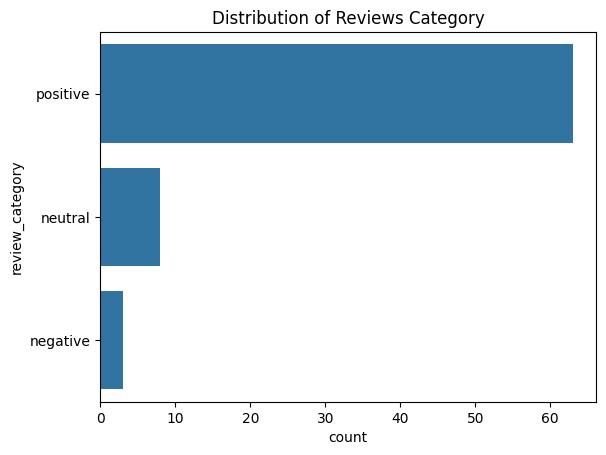

In [175]:
sns.countplot(df['review_category']).set_title("Distribution of Reviews Category")

In [176]:
positive_reviews=df.loc[df['review_category']=='positive','cleaned_reviews'].tolist() # extracting all positive reviews and converting to a list
positive_reviews[0:5]

['conserv style reliabl reason price watch 3 year origin batteri still run band genuin leather easili interchang black leather version fossil make without use special tool small lever pin make fashion matter attir wear brown shoesbelt brown band black shoesbelt black band time function work button tend stiff one seem work howev purchas time function rare use keep great time larg roman numer easi read arm length awayi assum leather band plan take waterin shower howev crown tend wiggl open long period worn crown engrav ridg get pull skin wrist move minor though beyond wash hand would take near water',
 'higher qualiti expect price visibl work gear make fun distract wait highli recommend',
 'realli good look time piec wear expens price point excel realli recommend fossil watch men',
 'look sveri pink plu came box floor heart color pinkcant understand advertis product men',
 'bought replac model watch due catastroph fall broke previou one watch face black perfect contrast light minutehour 

In [177]:
negative_reviews=df.loc[df['review_category']=='negative','cleaned_reviews'].tolist() # extracting all negative reviews and converting to a list
negative_reviews[0:5]

['good',
 'nag arjun',
 'worn seiko wrist watch decad gadget sturdi reliabl watch worn continu daili activ exercis etc deliveri time schedul']

Generating wordclouds separately for positive and negative reviews

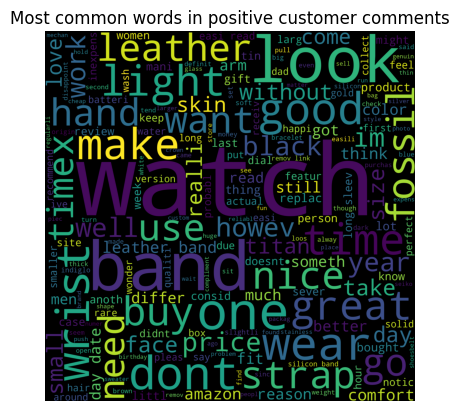

In [178]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='positive','cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in positive customer comments")
plt.axis('off')
plt.show()

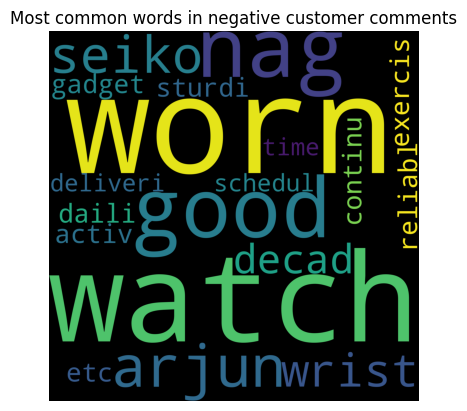

In [179]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='negative','cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in negative customer comments")
plt.axis('off')
plt.show()

# Unigrams

Unigrams are just individual words

In [180]:
from collections import Counter

Defining a function to get the most common words

In [187]:
def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews = reviews.split(" ")
    
    
    freq_counter = Counter(tokenised_reviews)
    return freq_counter.most_common(topn) # return words with the highest frequencies

In [182]:
top_20_positive_review_words = getMostCommon(positive_reviews,20)

In [183]:
top_20_positive_review_words

[('watch', 148),
 ('band', 70),
 ('look', 47),
 ('would', 35),
 ('one', 29),
 ('like', 27),
 ('leather', 26),
 ('get', 26),
 ('time', 24),
 ('wear', 23),
 ('wrist', 23),
 ('dont', 23),
 ('day', 22),
 ('good', 21),
 ('make', 20),
 ('light', 19),
 ('also', 19),
 ('great', 18),
 ('price', 17),
 ('well', 17)]

In [184]:
top_20_negative_review_words = getMostCommon(negative_reviews,20)

In [185]:
top_20_negative_review_words

[('worn', 2),
 ('watch', 2),
 ('good', 1),
 ('nag', 1),
 ('arjun', 1),
 ('seiko', 1),
 ('wrist', 1),
 ('decad', 1),
 ('gadget', 1),
 ('sturdi', 1),
 ('reliabl', 1),
 ('continu', 1),
 ('daili', 1),
 ('activ', 1),
 ('exercis', 1),
 ('etc', 1),
 ('deliveri', 1),
 ('time', 1),
 ('schedul', 1)]

Defining a function to produce a barplot of the most common words

In [188]:
def plotMostCommonWords(reviews_list,topn=20,title="Common Review Words",color="blue",axis=None): #default number of words is given as 20
    top_words = getMostCommon(reviews_list,topn=topn)
    data = pd.DataFrame()
    data['words'] = [val[0] for val in top_words]
    data['freq'] = [val[1] for val in top_words]
    if axis != None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

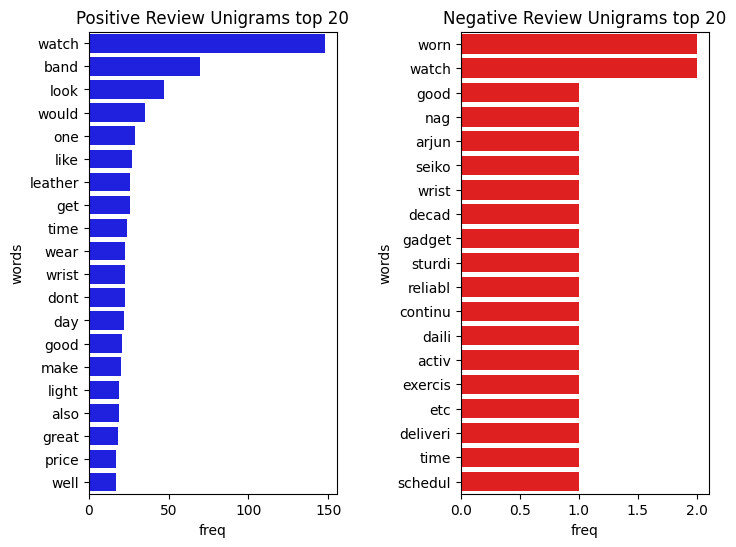

In [189]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotMostCommonWords(positive_reviews,20,"Positive Review Unigrams",axis=ax[0])

plotMostCommonWords(negative_reviews,20,"Negative Review Unigrams",color="red",axis=ax[1])

A unigram will not give us a clear understanding as to what is the customer trying to tell. Hence, we use bigrams.

# Bigrams

Bigrams are a combination of 2 words

Defining a function to create n-grams. It can be a combination of 2,3,4 or more words. This number can be given as an input to the function argument.

In [190]:
def generateNGram(text,n):
    tokens = text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

Creating bigrams for postive and negative reviews separately.

In [191]:
positive_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in positive_reviews]
negative_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in negative_reviews]

In [192]:
positive_reviews_bigrams[:5]

['conserv_style style_reliabl reliabl_reason reason_price price_watch watch_3 3_year year_origin origin_batteri batteri_still still_run run_band band_genuin genuin_leather leather_easili easili_interchang interchang_black black_leather leather_version version_fossil fossil_make make_without without_use use_special special_tool tool_small small_lever lever_pin pin_make make_fashion fashion_matter matter_attir attir_wear wear_brown brown_shoesbelt shoesbelt_brown brown_band band_black black_shoesbelt shoesbelt_black black_band band_time time_function function_work work_button button_tend tend_stiff stiff_one one_seem seem_work work_howev howev_purchas purchas_time time_function function_rare rare_use use_keep keep_great great_time time_larg larg_roman roman_numer numer_easi easi_read read_arm arm_length length_awayi awayi_assum assum_leather leather_band band_plan plan_take take_waterin waterin_shower shower_howev howev_crown crown_tend tend_wiggl wiggl_open open_long long_period period_

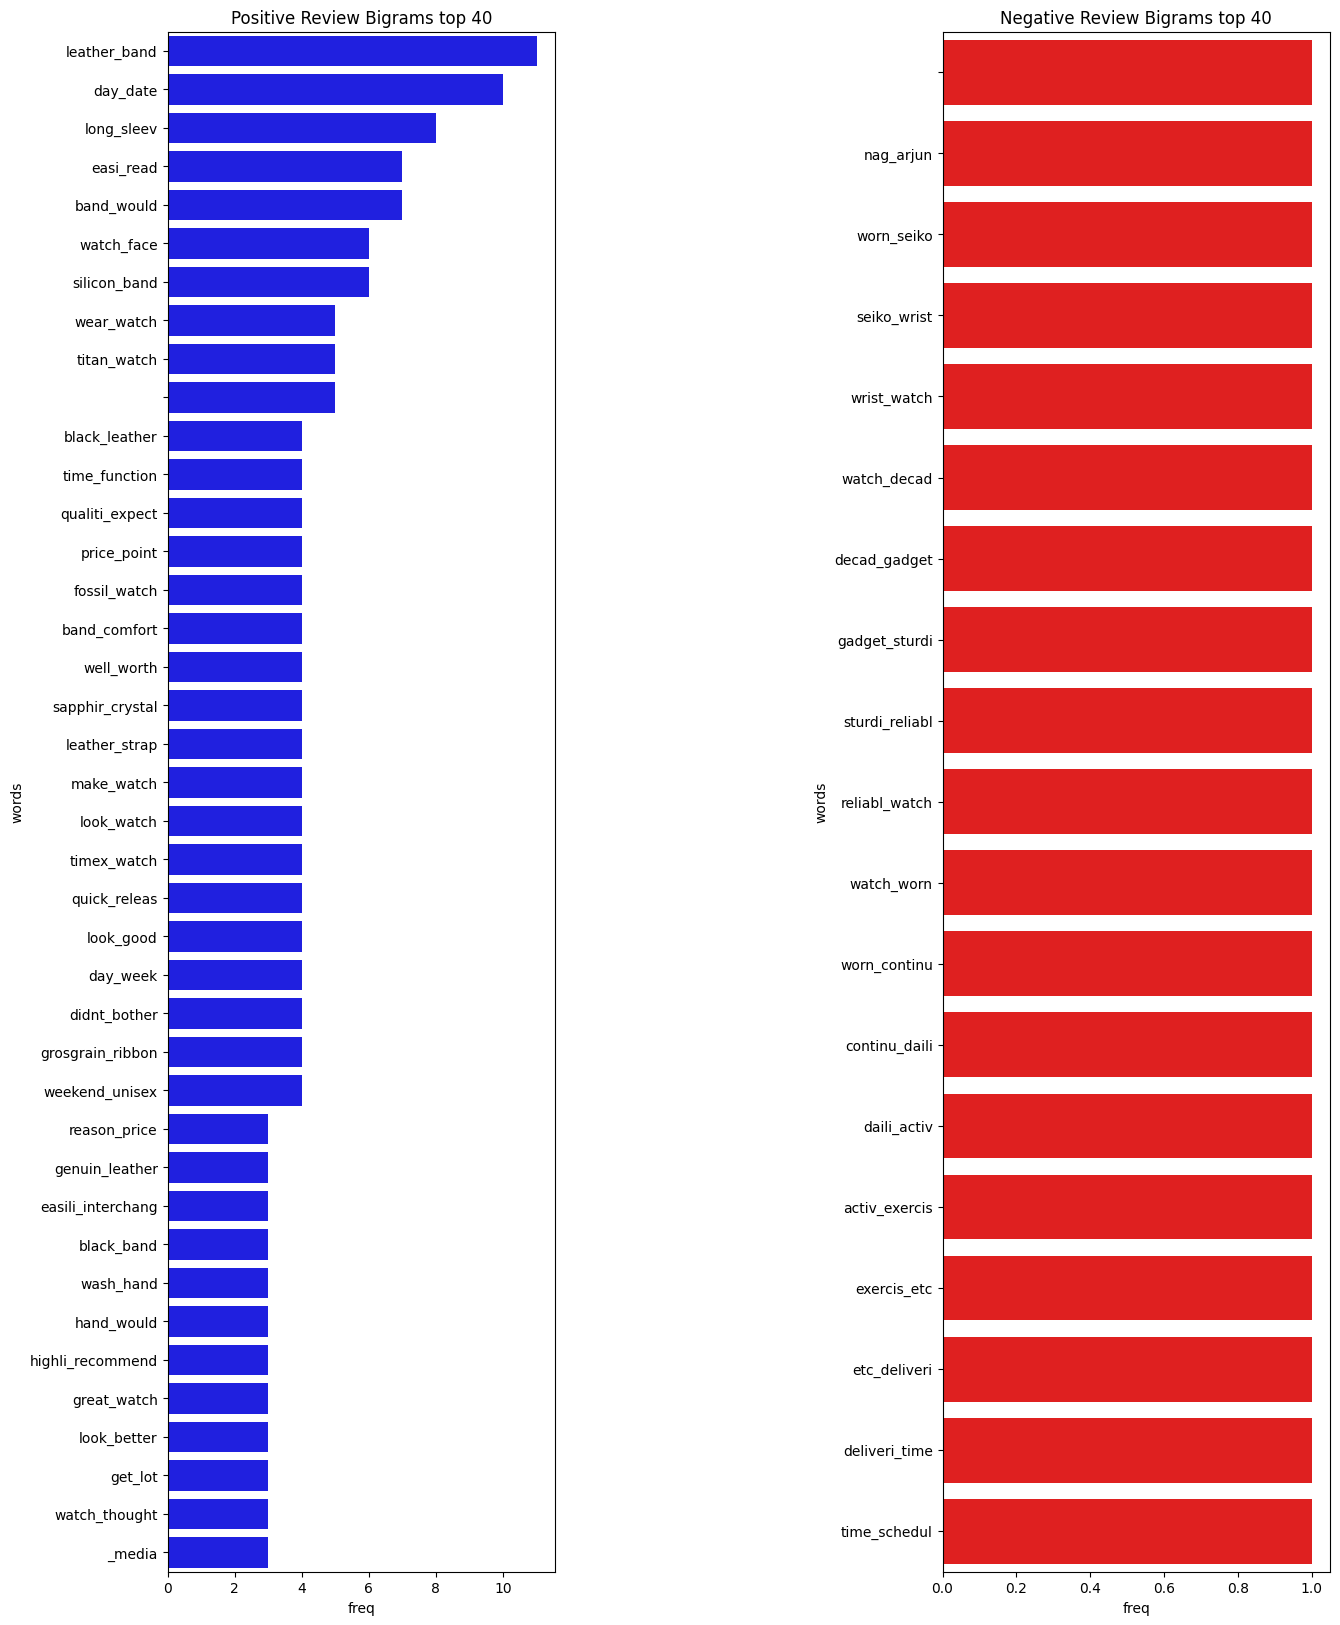

In [193]:
rcParams['figure.figsize'] = 15,20
fig,ax = plt.subplots(1,2)
fig.subplots_adjust(wspace=1)
plotMostCommonWords(positive_reviews_bigrams,40,"Positive Review Bigrams",axis=ax[0])

plotMostCommonWords(negative_reviews_bigrams,40,"Negative Review Bigrams",color="red",axis=ax[1])

# Write up

Sentiment Analysis

What is sentiment analysis?

In simple words, Sentiment analysis is defined as the process of mining of data, view, review or sentence to predict the emotion of the sentence through natural language processing (NLP), a branch of computer science concerned with giving computers the ability to understand text and spoken words in much the same way human beings can. The sentiment analysis involve classification of text into three phase “Positive”, “Negative” or“Neutral”. It analyzes the data and labels the ‘better’ and ‘worse’ sentiment as positive and negative respectively.

Sentiment Analysis is very helpful in a variety of applications, in this case it is used to understand the real customer feedbacks based on their comments and reviews.

### How is the data used in a sentiment analysis usually obtained?

This script presents the web scraping part that consist in a technique used to extract data from websites and store it in a CSV file: I create a function that can scrape Amazon reviews based on the ASIN (Amazon's product ID) given in input.

